## Decision Tree on Moons Dataset

In [315]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

Xmoons, Ymoons = make_moons(10000, noise=0.4)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xmoons, Ymoons, test_size=0.2)

In [316]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {"max_depth":[3,5,10,20,30],
          "max_leaf_nodes":[5,10,15,20,50,75,100],
          "min_samples_split":[2,5,10,20,50]
        }

treeModel = DecisionTreeClassifier(random_state=42)
search = GridSearchCV(treeModel, params, n_jobs=-1)
search.fit(Xtrain, Ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20, 30],
                         'max_leaf_nodes': [5, 10, 15, 20, 50, 75, 100],
                         'min_samples_split': [2, 5, 10, 20, 50]})

In [317]:
search.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, min_samples_split=50,
                       random_state=42)

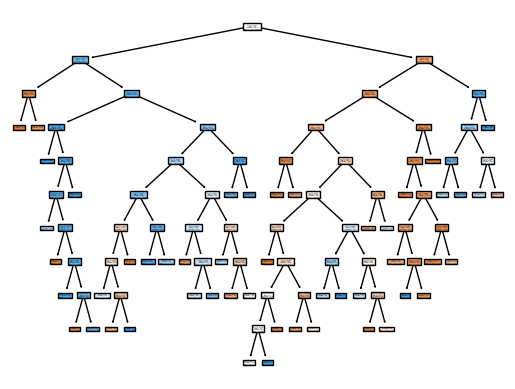

In [318]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(search.best_estimator_, filled=True)
plt.show()

In [319]:
finalModel = search.best_estimator_
finalModel.fit(Xtrain, Ytrain)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, min_samples_split=50,
                       random_state=42)

In [320]:
finalModel.score(Xtest, Ytest)

0.8615

A solo decision tree ends up with 85-88% accuracy.

## Random Forest Classifier

In [321]:
from sklearn.model_selection import ShuffleSplit
import numpy as np
from sklearn.base import clone

splitter = ShuffleSplit(n_splits=1000, random_state=42, train_size=100)
splits = splitter.split(Xtrain, Ytrain)

treeList = []

for trainIdxs, testIdxs in splits:
    Xdata = Xtrain[trainIdxs]
    Ydata = Ytrain[trainIdxs]
    tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20)
    tree.fit(Xdata, Ydata)
    treeList.append(tree)


In [322]:
from scipy import stats
from sklearn.metrics import accuracy_score

predictions = np.array([tree.predict(Xtest) for tree in treeList])

modePrediction = stats.mode(predictions, axis=0, keepdims=False).mode

accuracy_score(Ytest, modePrediction)

0.8665

The basic random forest classifier managed to improve accuracy by about half a percent on average.